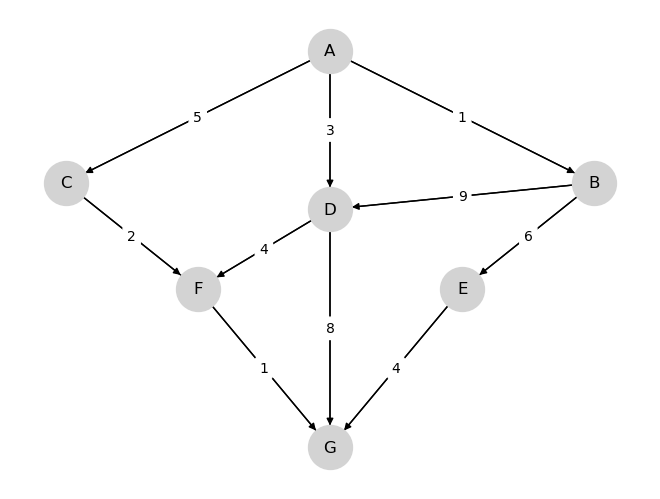

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

def create_base_graph():
    G = nx.DiGraph()
    nodes_with_positions = {
        'A': (0, 100),
        'B': (2, 50),
        'C': (-2, 50),
        'D': (0, 40),
        'E': (1, 10),
        'F': (-1, 10),
        'G': (0, -50)
    }
    for node, pos in nodes_with_positions.items():
        G.add_node(node, pos=pos)
    edges_with_weights = [
        ('A', 'B', 1),
        ('F', 'G', 1),
        ('C', 'F', 2),
        ('A', 'D', 3),
        ('D', 'F', 4),
        ('E', 'G', 4),
        ('A', 'C', 5),
        ('B', 'E', 6),
        ('D', 'G', 8),
        ('B', 'D', 9)
    ]
    for u, v, w in edges_with_weights:
        G.add_edge(u, v, weight=w)
    return G

def draw_base_graph(G, file_name):
    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, node_color='lightgrey', with_labels=True, node_size=1000)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)
    
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, rotate=False)
    
    plt.savefig(file_name)

G = create_base_graph()
draw_base_graph(G, file_name='graph.png')

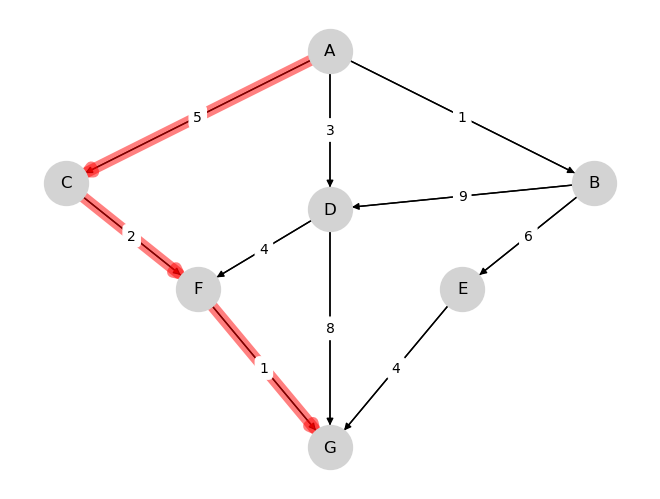

In [3]:
def draw_graph_with_highlights(G, highlighted_edges, edge_color, file_name):
    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, node_color='lightgrey', with_labels=True, node_size=1000)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

    nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges,
                           width=8, alpha=0.5, edge_color=edge_color, arrows=True)

    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, rotate=False)

    plt.savefig(file_name)

highlighted_edges_red = [('A', 'C'), ('C', 'F'), ('F', 'G')]
draw_graph_with_highlights(G, highlighted_edges_red, 'r', 'graph2.png')

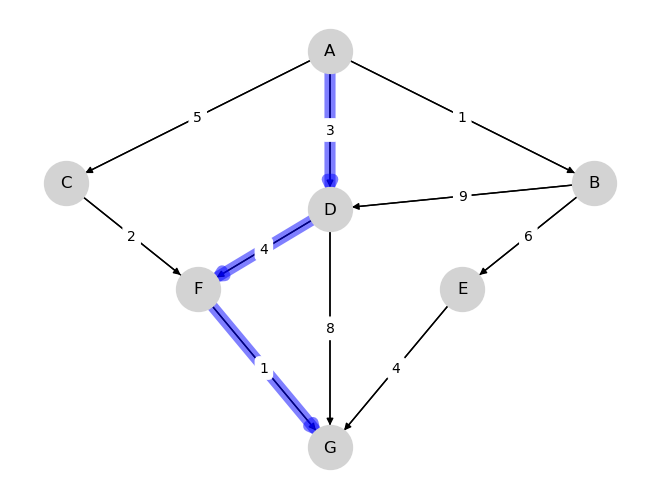

In [4]:
highlighted_edges_blue = [('A', 'D'), ('D', 'F'), ('F', 'G')]
draw_graph_with_highlights(G, highlighted_edges_blue, 'b', 'graph3.png')

colormap:

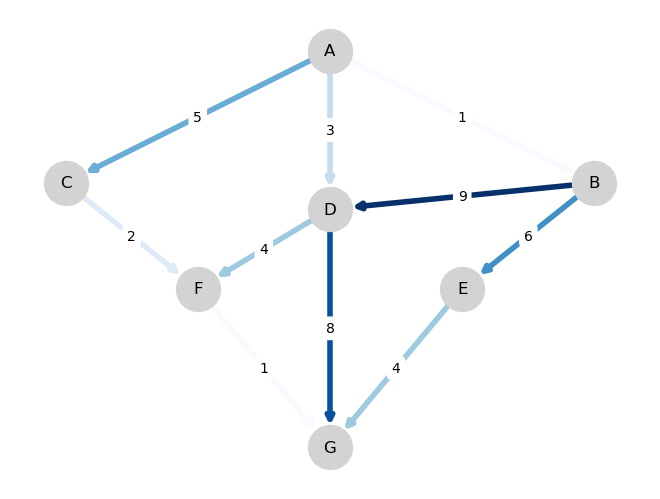

In [5]:
def draw_graph_with_colormap(G, file_name):
    pos = nx.get_node_attributes(G, 'pos')
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

    nx.draw(G, pos, node_color='lightgrey', with_labels=True, node_size=1000, edge_color=weights, width=4.0, edge_cmap=plt.cm.Blues)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, rotate=False)

    plt.savefig(file_name)
    plt.show()

draw_graph_with_colormap(G, 'graph4.png')

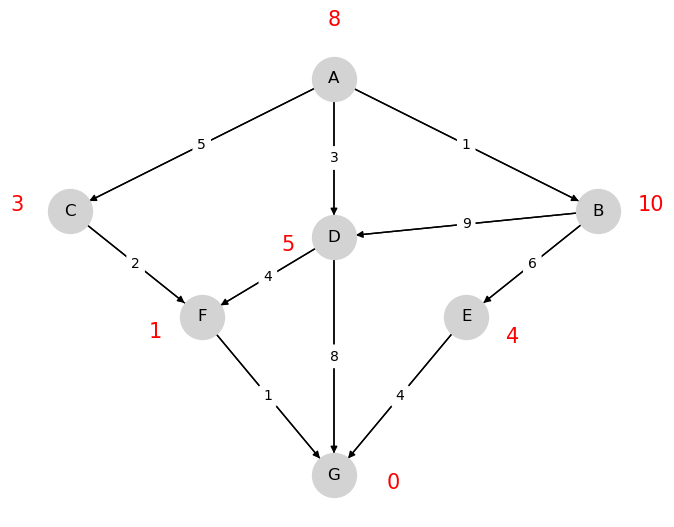

In [7]:
def draw_graph_with_custom_labels(G, file_name):
    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, node_color='lightgrey', with_labels=True, node_size=1000)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

    custom_labels = [
        (0, 120, '8'),
        (2.4, 50, '10'),
        (-2.4, 50, '3'),
        (-0.35, 35, '5'),
        (1.35, 0, '4'),
        (-1.35, 2, '1'),
        (0.45, -55, '0')
    ]
    
    for x, y, label in custom_labels:
        plt.text(x, y, s=label, color='red', size=15, horizontalalignment='center')

    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, rotate=False)

G = create_base_graph()

draw_graph_with_custom_labels(G, 'graph5.png')